Sumber : https://github.com/teguharia172/Exam-Data-Analytics-Visualization

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser

import warnings
warnings.filterwarnings('ignore')

## SUPERMARKET

### Masalah Bisnis
----------------------

Supermarket memiliki 3 Cabang yaitu A, B dan C. Dari ketiga Cabang yang mana yang memiliki Gross Income rendah ?

### Tujuan EDA
----------------------

1. Meningkatkan Gross Income pada Supermarket cabang yang bernilai rendah

## EDA SUPERMARKET

In [7]:
df = pd.read_csv('Supermarket.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


### Deskripsi Data Features dan Pengecekan NaN/Null Values
---------------------------

In [14]:
dfDesc = []
for i in df.columns:
    if df[i].nunique() > 3 :
        bla1 = df[i].drop_duplicates().sample(3).values
    else :
        bla1 = df[i].drop_duplicates().values
    
    dfDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) * 100), 2),
        df[i].nunique(),
        bla1
    ])
    
pd.DataFrame(dfDesc, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,Invoice ID,object,0,0.0,1000,"[227-07-4446, 151-16-1484, 277-63-2961]"
1,Branch,object,0,0.0,3,"[A, C, B]"
2,City,object,0,0.0,3,"[Yangon, Naypyitaw, Mandalay]"
3,Customer type,object,0,0.0,2,"[Member, Normal]"
4,Gender,object,0,0.0,2,"[Female, Male]"
5,Product line,object,0,0.0,6,"[Electronic accessories, Fashion accessories, ..."
6,Unit price,float64,0,0.0,943,"[86.04, 40.61, 46.33]"
7,Quantity,int64,0,0.0,10,"[10, 2, 5]"
8,Tax 5%,float64,0,0.0,990,"[3.6465, 9.294, 16.814]"
9,Total,float64,0,0.0,990,"[350.07, 629.16, 461.286]"


Tidak terdapat NUll/NaN Values di tiap kolom

### Deskripsi Statistik
---------------------------

In [17]:
modus_utk_stat = []
stat_desc = df.describe().T
modus = df.mode()

for i in modus.columns:
    for j in df.describe().columns:
        if i == j:
            modus_utk_stat.append(modus[i][0])

stat_desc['mode'] = modus_utk_stat
stat_desc.round(3)

,count,mean,std,min,25%,50%,75%,max,mode
Unit price,1000.0,55.672,26.495,10.080,32.875,55.230,77.935,99.960,83.770
Quantity,1000.0,5.510,2.923,1.000,3.000,5.000,8.000,10.000,10.000
Tax 5%,1000.0,15.379,11.709,0.508,5.925,12.088,22.445,49.650,4.154
Total,1000.0,322.967,245.885,10.678,124.422,253.848,471.350,1042.650,87.234
cogs,1000.0,307.587,234.177,10.170,118.497,241.760,448.905,993.000,83.080
gross margin percentage,1000.0,4.762,0.000,4.762,4.762,4.762,4.762,4.762,4.762
gross income,1000.0,15.379,11.709,0.508,5.925,12.088,22.445,49.650,4.154
Rating,1000.0,6.973,1.719,4.000,5.500,7.000,8.500,10.000,6.000


### Pengecekan Outliers
-----------------------------

In [20]:
Desc_outliers = []

for i in df.describe().columns:
    Q1 = df.describe()[i]['25%']
    Q3 = df.describe()[i]['75%']
    IQR = Q3 - Q1
    upper_fence = Q3 + (1.5*IQR)
    lower_fence = Q1 - (1.5*IQR)
    hitung = 0
    
    for j in df[i]:
        if (j < lower_fence) | (j > upper_fence) :
            hitung+=1
    Desc_outliers.append([
        i,
        hitung,
        upper_fence,
        lower_fence
    ])

out = pd.DataFrame(Desc_outliers, columns=[
    "Data Features",
    "Jumlah Outliers",
    "Upper Fence",
    "Lower Fence"
])
out

,Data Features,Jumlah Outliers,Upper Fence,Lower Fence
0,Unit price,0,145.525000,-34.715000
1,Quantity,0,15.500000,-4.500000
2,Tax 5%,9,47.225812,-18.855687
3,Total,9,991.742062,-395.969438
4,cogs,9,944.516250,-377.113750
5,gross margin percentage,0,4.761905,4.761905
6,gross income,9,47.225812,-18.855687
7,Rating,0,13.000000,1.000000


Dalam hal ini terdapat outliers di kolom:
1. Tax 5%
2. Total
3. cogs
4. gross income

dengan jumlah masing2 yaitu 9 data

__Outliers di Tax 5%__

In [23]:
outliers_tax = df[(df['Tax 5%'] < out['Lower Fence'][out['Data Features']=='Tax 5%'][2]) | (df['Tax 5%'] > out['Upper Fence'][out['Data Features']=='Tax 5%'][2])]
outliers_tax[['Invoice ID', 'Tax 5%']]

,Invoice ID,Tax 5%
166,234-65-2137,47.790
167,687-47-8271,49.490
350,860-79-0874,49.650
357,554-42-2417,47.720
422,271-88-8734,48.605
557,283-26-5248,49.260
699,751-41-9720,48.750
792,744-16-7898,48.685
996,303-96-2227,48.690


__Outliers di Total__

In [25]:
outliers_total = df[(df['Total'] < out['Lower Fence'][out['Data Features']=='Total'][3]) | (df['Total'] > out['Upper Fence'][out['Data Features']=='Total'][3])]
outliers_total[['Invoice ID', 'Total']]

,Invoice ID,Total
166,234-65-2137,1003.590
167,687-47-8271,1039.290
350,860-79-0874,1042.650
357,554-42-2417,1002.120
422,271-88-8734,1020.705
557,283-26-5248,1034.460
699,751-41-9720,1023.750
792,744-16-7898,1022.385
996,303-96-2227,1022.490


__Outliers di cogs__

In [26]:
outliers_cogs = df[(df['cogs'] < out['Lower Fence'][out['Data Features']=='cogs'][4]) | (df['cogs'] > out['Upper Fence'][out['Data Features']=='cogs'][4])]
outliers_cogs[['Invoice ID', 'cogs']]

,Invoice ID,cogs
166,234-65-2137,955.8
167,687-47-8271,989.8
350,860-79-0874,993.0
357,554-42-2417,954.4
422,271-88-8734,972.1
557,283-26-5248,985.2
699,751-41-9720,975.0
792,744-16-7898,973.7
996,303-96-2227,973.8


__Outliers di gross income__

In [27]:
outliers_gross_income = df[(df['gross income'] < out['Lower Fence'][out['Data Features']=='gross income'][6]) | (df['gross income'] > out['Upper Fence'][out['Data Features']=='gross income'][6])]
outliers_gross_income[['Invoice ID', 'gross income']]

,Invoice ID,gross income
166,234-65-2137,47.790
167,687-47-8271,49.490
350,860-79-0874,49.650
357,554-42-2417,47.720
422,271-88-8734,48.605
557,283-26-5248,49.260
699,751-41-9720,48.750
792,744-16-7898,48.685
996,303-96-2227,48.690


Karena dibutuhkan data secara komperhensif dan informatif, oleh karena itu outliers tidak didrop.

### Gross income di masing2 cabang
----------------------

In [125]:
df['Tahun'] = (df['Date'].apply(dateparser.parse)).dt.year
df['Bulan'] = (df['Date'].apply(dateparser.parse)).dt.month_name()
df['nama_hari'] = (df['Date'].apply(dateparser.parse)).dt.day_name()
df['tanggal'] = (df['Date'].apply(dateparser.parse)).dt.day
df['urutan_hari'] = (df['Date'].apply(dateparser.parse)).dt.dayofweek
df['Jam'] = (df['Time'].apply(dateparser.parse)).dt.hour
df['urutan_bulan'] = 0
df['urutan_bulan'][df['Bulan']=='January'] = 1
df['urutan_bulan'][df['Bulan']=='February'] = 2
df['urutan_bulan'][df['Bulan']=='March'] = 3

In [124]:
pd.crosstab(index=df['Branch'] , columns = 'total_grossincome', values=df['gross income'], aggfunc='sum')

col_0,total_grossincome
Branch,
A,5057.1605
B,5057.0320
C,5265.1765


__Insight__

- Berdasarkan Cabang/Branch nya, Branch A dan B memiliki total Gross income yang rendah. Masing-masing bernilai 5057.1605 dollars dan 5057.0320 dollars. Paling rendah ada di Branch B.

### Gross income di masing2 cabang tiap bulannya
----------------------

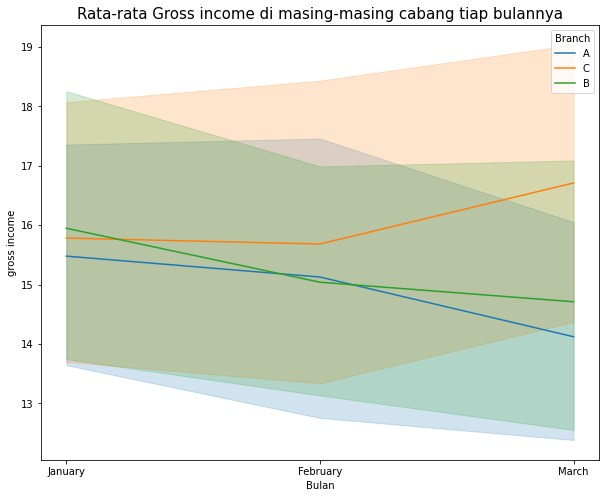

In [136]:
plt.figure(figsize=(10,8))
plt.title('Rata-rata Gross income di masing-masing cabang tiap bulannya', size = 15)
sns.lineplot(data=df.sort_values(by=['urutan_bulan']), x='Bulan', y='gross income', hue='Branch')
plt.show()

In [153]:
tabel_gibulan = (pd.crosstab(index=[df['Branch'], df['Bulan']], columns = 'rata-rata grossincome', values=df['gross income'], aggfunc='mean'))

__Insight__

1. Branch A terus mengalami penurunan tiap bulannya. paling rendah ada di bulan Maret dengan rata-rata gross income 14.12 dollars
2. Branch B juga mengalami penurunan tiap bulannya, tetapi tidak serendah Branch A. Paling rendah ada di bulan Maret dengan gross income 14.71 dollars

### Gross income di masing2 cabang tiap harinya
----------------------

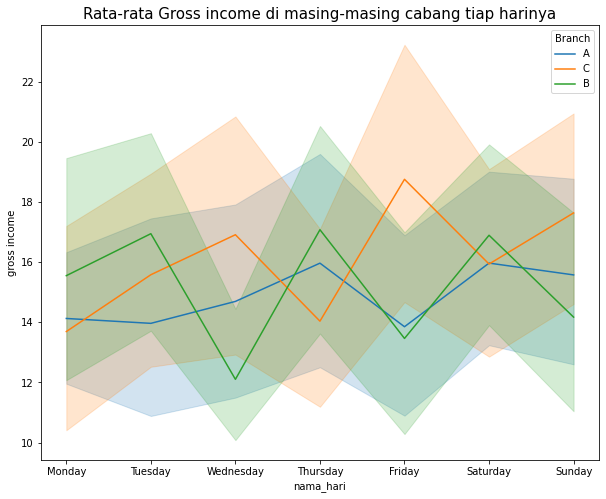

In [144]:
plt.figure(figsize=(10,8))
plt.title('Rata-rata Gross income di masing-masing cabang tiap harinya', size = 15)
sns.lineplot(data=df.sort_values(by=['urutan_hari']), x='nama_hari', y='gross income', hue='Branch')
plt.show()

In [152]:
tabel_gihari = (pd.crosstab(index=[df['Branch'], df['nama_hari']], columns = 'rata-rata grossincome', values=df['gross income'], aggfunc='mean'))

__Insight__

1. Branch A mengalami keuntungan/gross income paling rendah di hari Selasa dan Jumat dengan rata-rata masing-masing 13.96 dan 13.85 dollars
2. Branch B mengalami keuntungan/gross income paling rendah di hari Rabu, Jumat dan Minggu dengan rata-rata masing-masing 12.1, 13.46 dan 14.17 dollarsdi bulan Maret dengan rata-rata gross income 14.12 dollars
2. Branch B juga mengalami penurunan tiap bulannya, tetapi tidak serendah Branch A. Paling rendah ada di bulan Maret dengan gross income 14.71 dollars 

### Gross income di masing2 cabang tiap jamnya
----------------------

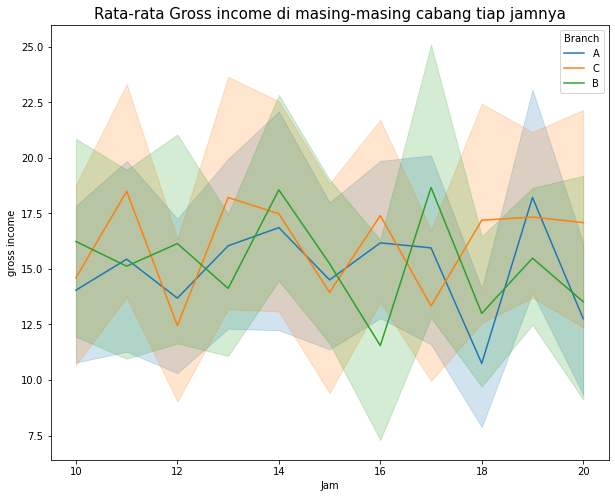

In [156]:
plt.figure(figsize=(10,8))
plt.title('Rata-rata Gross income di masing-masing cabang tiap jamnya', size = 15)
sns.lineplot(data=df, x='Jam', y='gross income', hue='Branch')
plt.show()

In [151]:
tabel_gijam = (pd.crosstab(index=[df['Branch'], df['Jam']], columns = 'rata-rata grossincome', values=df['gross income'], aggfunc='mean'))

__Insight__

1. Branch A mengalami keuntungan/gross income paling rendah di jam 6 Sore/18:00 dengan rata-rata 10.75 dollars
2. Branch B mengalami keuntungan/gross income paling rendah di jam 4 sore/16:00 dengan rata-rata 11.55 dollars

### Gross income di masing2 cabang tiap produknya
----------------------

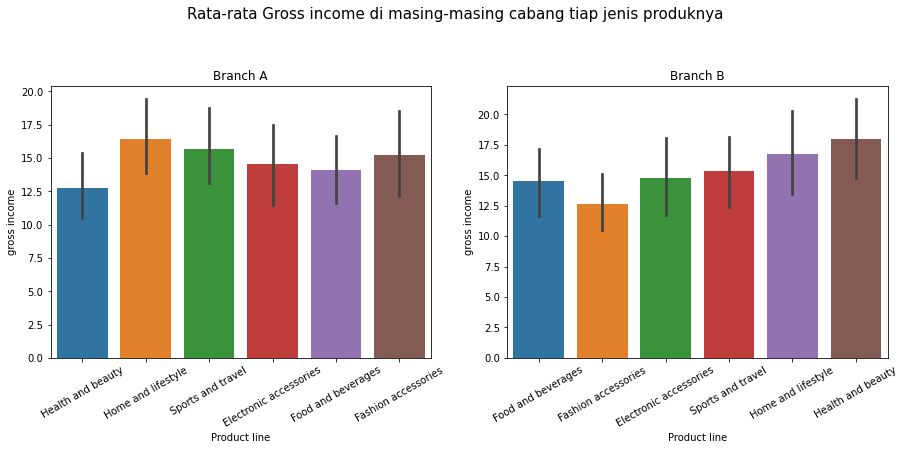

In [184]:
plt.figure(figsize=(15,5))
plt.suptitle('Rata-rata Gross income di masing-masing cabang tiap jenis produknya', size = 15, x=0.5, y=1.1)


plt.subplot(121)
sns.barplot(data=df[df['Branch'] == 'A'], x='Product line', y='gross income')
plt.xticks(rotation=30)
plt.title('Branch A')

plt.subplot(122)
sns.barplot(data=df[df['Branch'] == 'B'], x='Product line', y='gross income')
plt.xticks(rotation=30)
plt.title('Branch B')

plt.show()

In [198]:
tabel_gipl = pd.crosstab(index=[df['Branch'], df['Product line']], columns = 'rata-rata gross Income', values=df['gross income'], aggfunc='mean')
print('\n\nPRODUK DI BRANCH A YANG GROSS INCOMENYA DIBAWAH RATA-RATA')
tabel_gipl.loc['A'] [tabel_gipl.loc['A'] < tabel_gipl.loc['A'].mean()[0]]



PRODUK DI BRANCH A YANG GROSS INCOMENYA DIBAWAH RATA-RATA


col_0,rata-rata gross Income
Product line,
Electronic accessories,14.537392
Fashion accessories,NaN
Food and beverages,14.091216
Health and beauty,12.763681
Home and lifestyle,NaN
Sports and travel,NaN


In [199]:
print('\n\nPRODUK DI BRANCH B YANG GROSS INCOMENYA DIBAWAH RATA-RATA')
tabel_gipl.loc['B'] [tabel_gipl.loc['B'] < tabel_gipl.loc['B'].mean()[0]]



PRODUK DI BRANCH B YANG GROSS INCOMENYA DIBAWAH RATA-RATA


col_0,rata-rata gross Income
Product line,
Electronic accessories,14.763155
Fashion accessories,12.606234
Food and beverages,14.490370
Health and beauty,NaN
Home and lifestyle,NaN
Sports and travel,NaN


__Insight__

1. Jenis produk Branch A yang memiliki gross income di bawah rata-rata adalah Electronic accessories, Food and beverages dan Health and beauty dengan nilai masing-masing 14.54,  14.1 dan 12.76 dollars. Paling rendah di jenis produk Health and beauty.

2. Jenis produk Branch B yang memiliki gross income di bawah rata-rata adalah Electronic accessories, Food and beverages dan Fashion accessories dengan nilai masing-masing 14.76,  14.49 dan 12.61 dollars. Paling rendah di jenis produk Fashion accessories.

### KESIMPULAN

1. Berdasarkan Cabang/Branch nya, Branch A dan B memiliki total Gross income yang rendah. Masing-masing bernilai 5057.1605 dollars dan 5057.0320 dollars. Paling rendah ada di Branch B.

2. Berdasarkan bulannya Branch A dan B terus mengalami penurunan sampai bulan Maret dengan rata-rata Gross income di bulan Maret nya masing2 sebesar 14.12 dollars dan 14.71 dollars

3. Berdasarkan harinya Branch A dan B memilki rata-rata gross income yang fluktuatif. Branch A mengalami gross income paling rendah di hari Selasa dan Jumat dengan rata-rata masing-masing 13.96 dan 13.85 dollars sedangkan Branch B mengalami gross income paling rendah di hari Rabu, Jumat dan Minggu dengan rata-rata masing-masing 12.1, 13.46 dan 14.17 dollars

4. Berdasarkan jamnya Branch A dan B memilki rata-rata gross income yang fluktuatif. Branch A mengalami gross income paling rendah di jam 6 Sore/18:00 dengan rata-rata 10.75 dollars sedangkan Branch B mengalami gross income paling rendah di jam 4 Sore/16:00 dengan rata-rata 11.55 dollars

5. Berdasarkan Jenis produknya, di Branch A yang memiliki gross income di bawah rata-rata adalah Electronic accessories, Food and beverages dan Health and beauty dengan nilai masing-masing 14.54, 14.1 dan 12.76 dollars. Paling rendah di jenis produk Health and beauty. Jenis produk Branch B yang memiliki gross income di bawah rata-rata adalah Electronic accessories, Food and beverages dan Fashion accessories dengan nilai masing-masing 14.76, 14.49 dan 12.61 dollars. Paling rendah di jenis produk Fashion accessories.

### SARAN/REKOMENDASI

1. Untuk branch A, Pemberian promo pada produk terutama Health and beauty di hari Selasa dan Jum'at jam 16:00 - 18:00
2. Untuk branch B, Pemberian promo pada produk terutama Fashion accessories di hari Rabu, Jum'at dan Minggu jam 14:00 - 16:00

In [222]:
a = df[(df['Branch']=='A') & (df['Product line']=='Health and beauty') & ((df['nama_hari']=='Tuesday') | (df['nama_hari']=='Friday'))] 
a.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Jam,Tahun,tanggal,urutan_hari,urutan_bulan
Unit price,1.000000,-0.303800,0.576901,0.576901,0.576901,NaN,0.576901,-0.305714,-0.127012,NaN,-0.034436,0.250210,0.268648
Quantity,-0.303800,1.000000,0.543466,0.543466,0.543466,NaN,0.543466,-0.025804,0.467565,NaN,0.300239,0.277787,0.092217
Tax 5%,0.576901,0.543466,1.000000,1.000000,1.000000,NaN,1.000000,-0.275046,0.338926,NaN,0.292960,0.299769,0.254081
Total,0.576901,0.543466,1.000000,1.000000,1.000000,NaN,1.000000,-0.275046,0.338926,NaN,0.292960,0.299769,0.254081
cogs,0.576901,0.543466,1.000000,1.000000,1.000000,NaN,1.000000,-0.275046,0.338926,NaN,0.292960,0.299769,0.254081
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.576901,0.543466,1.000000,1.000000,1.000000,NaN,1.000000,-0.275046,0.338926,NaN,0.292960,0.299769,0.254081
Rating,-0.305714,-0.025804,-0.275046,-0.275046,-0.275046,NaN,-0.275046,1.000000,-0.030356,NaN,-0.467437,0.168960,-0.281581
Jam,-0.127012,0.467565,0.338926,0.338926,0.338926,NaN,0.338926,-0.030356,1.000000,NaN,-0.030502,0.075689,-0.136800
Tahun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dapat dilihat bahwa terjadi korelasi negatif untuk produk Health and beauty di branch A pada kolom Quantity dan Unit Price, yang artinya ketika harga semakin tinggi, maka kuantitas yang dibeli akan semakin sedikit, begitupun sebaliknya oleh karena itu pemberian promo dapat meningkatkan kuantitas barang yang dibeli.

In [253]:
a['gross income'].sum()

134.2245

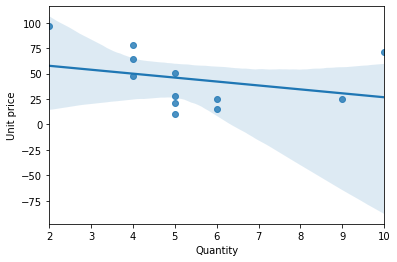

In [225]:
sns.regplot(x='Quantity', y='Unit price', data = a)
plt.show()

memakai persamaan korelas : y = a + bx dimana b adalah nilai korelasinya y = harga dan x= quantity, a adalah y ketika x = 0. 

asumsi y = 0 ketika x = 0 sehingga persamaannya ==> Unit_price = -0.3 * Quantity

jika ingin diberikan promo 20% maka quantitynya 

In [254]:
a_baru = a[['Unit price', 'Quantity', 'cogs']]
a_baru['harga baru'] = a_baru['Unit price'] - (a_baru['Unit price']*0.2)
a_baru['kuantitas'] = round(a_baru['harga baru']/0.3, 0)
a_baru['Tax'] = (a_baru['harga baru']*a_baru['kuantitas'])*0.05
a_baru['Total'] = (a_baru['harga baru']*a_baru['kuantitas']) -  (a_baru['Tax'])
a_baru['gross income baru'] = a_baru['Total'] - a_baru['cogs']
a_baru['gross income baru'].sum()

62671.33

Jika berdasarkan hasil perhitungan, dengan memberikan diskon 20% dapat meningktakan total gross income untuk jenis produk Health and beauty di Branch A pada hari Selasa dan jumat hingga 62671.33 dollars dari 134 dollars